*NOTEBOOK ABOUT THE FIRST WORKSHOP*

Used libraries

In [1]:
pip install -r requirements.txt

  Using cached mysql-0.0.3-py3-none-any.whl.metadata (746 bytes)
  Using cached matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached psycopg2_binary-2.9.9-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached SQLAlchemy-2.0.28-cp312-cp312-win_amd64.whl.metadata (9.8 kB)
  Using cached SQLAlchemy_Utils-0.41.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached mysqlclient-2.2.4-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mysql_connector-2.2.9-cp312-cp312-win_amd64.whl
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadat

In [2]:
pip install --upgrade mysql-connector-python

  Using cached mysql_connector_python-8.3.0-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
Using cached mysql_connector_python-8.3.0-cp312-cp312-win_amd64.whl (15.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import json
import mysql.connector
import matplotlib.pyplot as plt   
import seaborn as sns

Connection with MySQL

In [5]:
import json
import mysql.connector
with open('credentials.json', 'r') as json_file:
    credentials = json.load(json_file)
    
connection = mysql.connector.connect(
    host=credentials['host'],
    user=credentials['user'],
    password=credentials['password'],
)

print(connection)    


Creating the database and table

In [6]:
cursor = connection.cursor()

cursor.execute("CREATE DATABASE IF NOT EXISTS workshopdb1")

cursor.execute("USE workshopdb1")

cursor.execute("""
        CREATE TABLE IF NOT EXISTS candidates (
            FirstName VARCHAR(100) PRIMARY KEY,
            LastName VARCHAR(100),
            Email VARCHAR(100),
            ApplicationDate DATE,
            Country VARCHAR(70),
            YOE INT,
            Seniority VARCHAR(50),
            Technology VARCHAR(70),
            CodeChallengeScore INT,
            TechnicalInterviewScore INT
        )
    """)

Data import

In [7]:
with open('credentials.json', 'r') as json_file:
    credentials = json.load(json_file)

data = pd.read_csv('candidates.csv', sep=';')

import sqlalchemy as sa

engine = sa.create_engine(
    f"mysql+mysqlconnector://{credentials['user']}:{credentials['password']}@{credentials['host']}/{credentials['database']}",
    connect_args={"auth_plugin": "mysql_native_password"} 
)


data.to_sql(name='candidates', con=engine, if_exists='replace', index=False)




50000

*EDA*

In [8]:
#Used the table like DataFrame
df = pd.read_sql_table('candidates', engine)

engine.dispose()


In [9]:
df.head( )

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore
0,Bernadette,Langworth,leonard91@yahoo.com,26/02/2021,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,09/09/2021,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,14/04/2020,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,01/10/2020,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,20/05/2020,Myanmar,13,Mid-Level,Social Media Community Management,9,7


    Can see the variables that make up our table, there are 10 columns, 6 are String, 3 are Integer and 1 is in Date format.

In [10]:
df.describe()

,YOE,CodeChallengeScore,TechnicalInterviewScore
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


        We do a describe to see the basic statistics of our numerical columns. From here we can draw several conclusions:
         -About the Standar Desviation, In YOE is 8, CodeChallengeScore is 3 and Technicall is 3 too, so this result show the values per   column tend to move away from their respective mean.
         -We observe that in 2 of the variables its maximum value is up to 10.
         -Candidates have an average of 15 years of experience, they have good experience.

We graph a boxplot for each of our numerical variables, to see how the data is made up

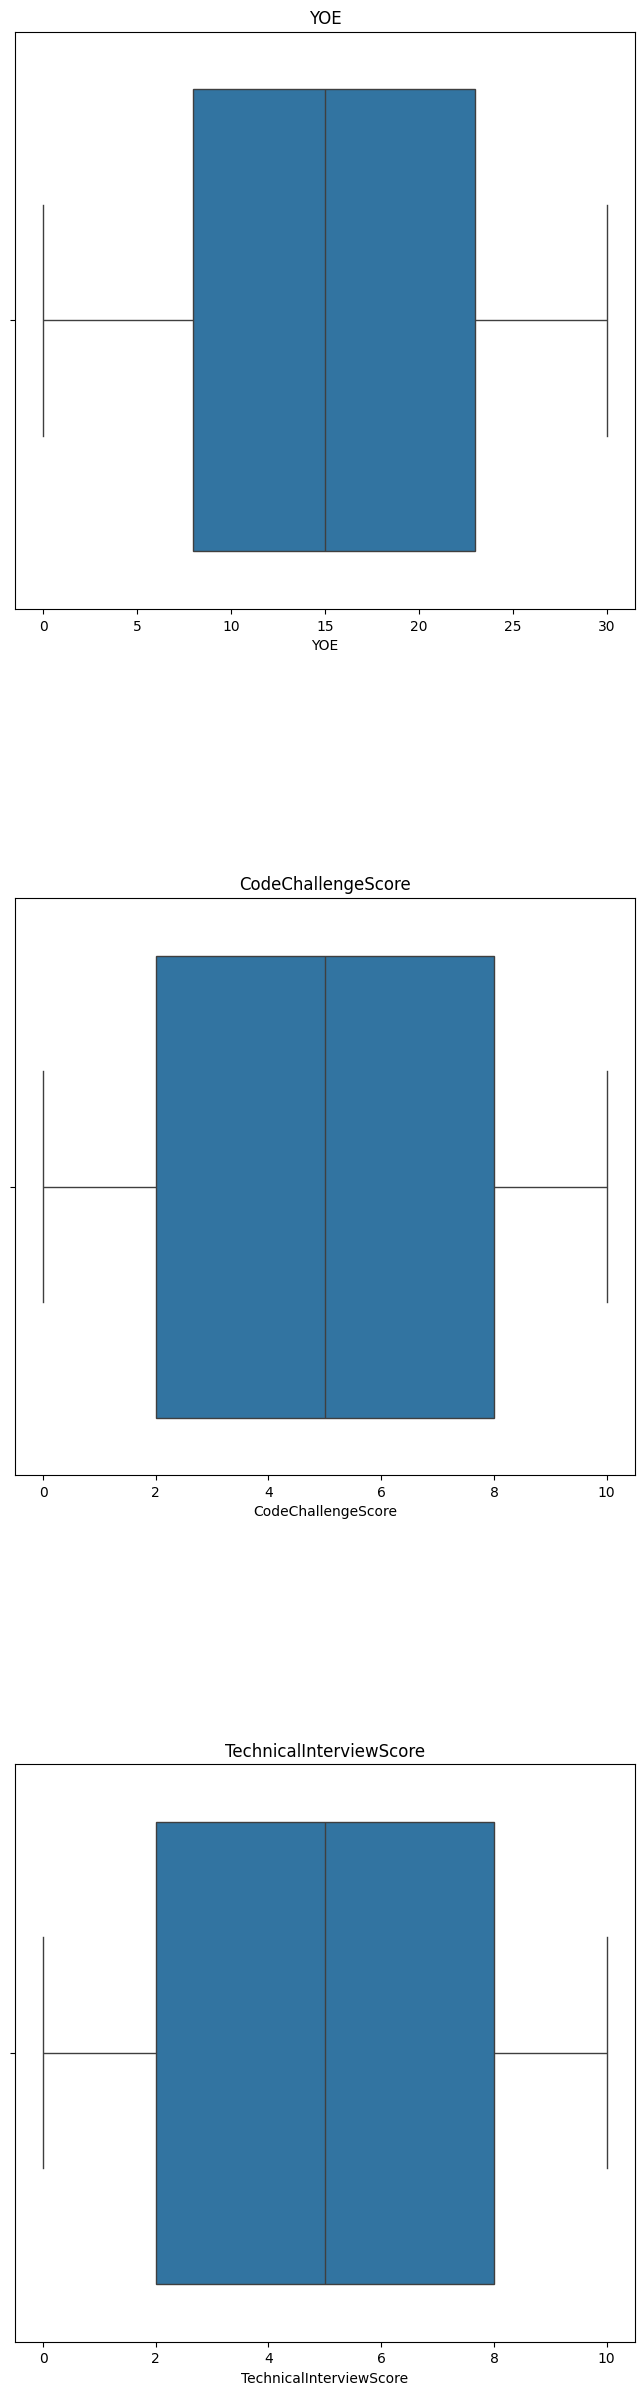

In [13]:
cols_num = ['YOE', 'CodeChallengeScore', 'TechnicalInterviewScore']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

plt.show()


    The conclusion on this point is that the values are symmetrical since they seem to be well grouped around the medians. 

Which country has the most candidates?

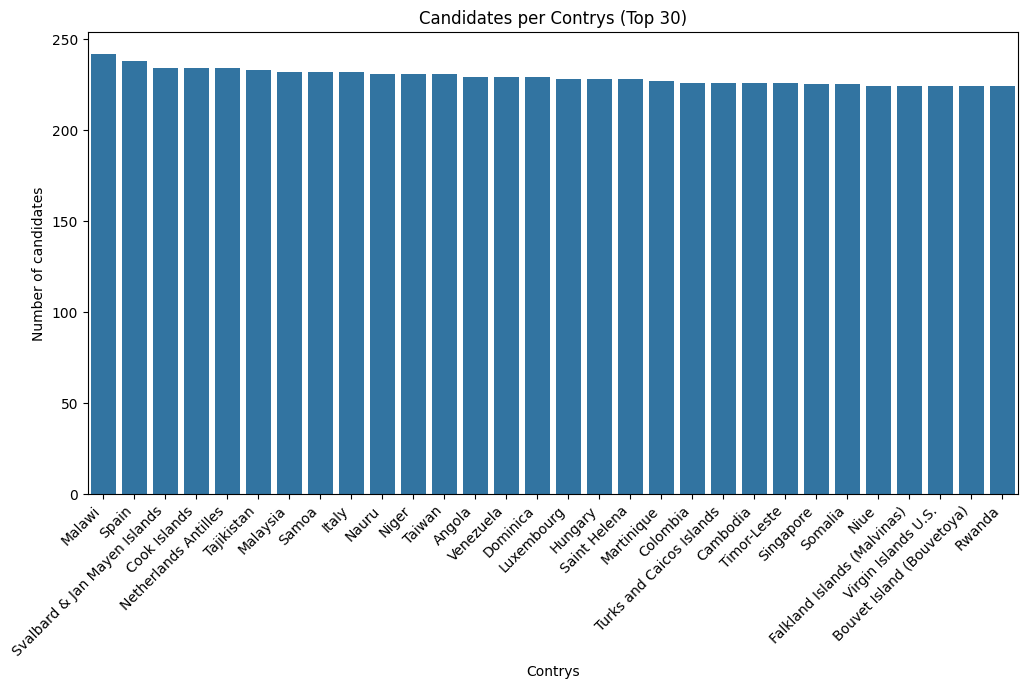

In [14]:
country_counts = df['Country'].value_counts()

top_countries = country_counts.head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Candidates per Contrys (Top 30)')
plt.xlabel('Contrys')
plt.ylabel('Number of candidates')
plt.xticks(rotation=45, ha='right')
plt.show()

    We see almost equal values for the first 30 countries
    Colombia is among the top 30
    4 countries are Spanish speaking

How many candidates have Data Engineer as their favorite Technology?

In [17]:
data_engineer_candidates = df[df['Technology'] == 'Data Engineer']

num_data_engineer_candidates = len(data_engineer_candidates)

print(f"candidates with Data Engineer as their favorite technology is : {num_data_engineer_candidates}")


candidates with Data Engineer as their favorite technology is : 1951


    Data engineering is a skill that must be learned in these times, that is why we wanted to know how many Candidates have this skill, and we see that there are 1951, that is a large number of candidates.

Technologies preferred by candidates


C:\Users\playc\AppData\Local\Temp\ipykernel_10428\2830033540.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_technologies.index, rotation=45, ha='right')


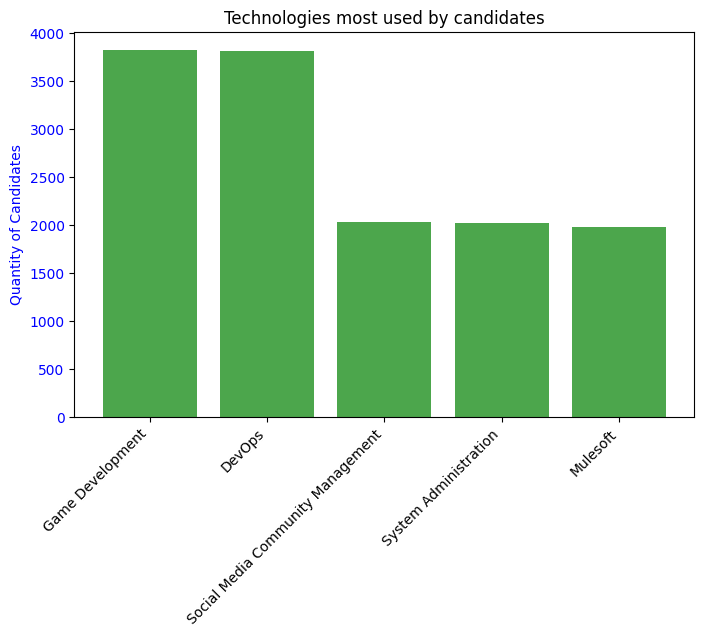

In [18]:
top_technologies = df['Technology'].value_counts().head(5)

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(top_technologies.index, top_technologies, color='Green', alpha=0.7, label='Technologies')

ax1.set_ylabel('Quantity of Candidates', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticklabels(top_technologies.index, rotation=45, ha='right')

plt.title('Technologies most used by candidates')
plt.show()


    -This graph shows us the first 5 preferred technologies, 2 very close, Game Development, and DevOPS, both exceeding the number of 3500 candidates.
    -And the other 3 skills, also very close, below the 2500 candidates

*NEW TABLE*

We need to add a new column where the candidates have 7 or more in CodeChallengeScore and TechnicalInterviewScore to be approved, where we will use 0 and 1 to determine if they were approved or not

In [19]:
df['Approved'] = 0

approved_candidates = df[(df['CodeChallengeScore'] >= 7) & (df['TechnicalInterviewScore'] >= 7)]

df.loc[approved_candidates.index, 'Approved'] = 1

print(df)

        FirstName    LastName                       Email ApplicationDate  \
0      Bernadette   Langworth         leonard91@yahoo.com      26/02/2021   
1          Camryn    Reynolds         zelda56@hotmail.com      09/09/2021   
2           Larue      Spinka    okey_schultz41@gmail.com      14/04/2020   
3            Arch      Spinka      elvera_kulas@yahoo.com      01/10/2020   
4           Larue  Altenwerth   minnie.gislason@gmail.com      20/05/2020   
...           ...         ...                         ...             ...   
49995     Bethany     Shields  rocky_mitchell@hotmail.com      09/01/2022   
49996         Era  Swaniawski    dolores.roob@hotmail.com      02/06/2020   
49997      Martin       Lakin   savanah.stracke@gmail.com      15/12/2018   
49998       Aliya   Abernathy  vivienne.fritsch@yahoo.com      30/05/2020   
49999     Coleman      Wisozk   abigayle.crooks@yahoo.com      13/06/2022   

                  Country  YOE  Seniority                         Technolog

Verificamos que este funcionando

In [20]:
df.head()

,FirstName,LastName,Email,ApplicationDate,Country,YOE,Seniority,Technology,CodeChallengeScore,TechnicalInterviewScore,Approved
0,Bernadette,Langworth,leonard91@yahoo.com,26/02/2021,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,09/09/2021,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,14/04/2020,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,01/10/2020,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,20/05/2020,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1


Since we have a new column for approved candidates, let's create a new table to create this information

In [21]:
cursor = connection.cursor()

cursor.execute("USE workshopdb1")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS candidates_approved (
        FirstName VARCHAR(100) PRIMARY KEY,
        LastName VARCHAR(100),
        Email VARCHAR(100),
        ApplicationDate DATE,
        Country VARCHAR(70),
        YOE INT,
        Seniority VARCHAR(50),
        Technology VARCHAR(70),
        CodeChallengeScore INT,
        TechnicalInterviewScore INT,
        Approved INT
    )
""")

Now we save the dataframe that we had in a csv to load it into this new table (To make it easier and do the step done previously)

In [22]:
df.to_csv('candidates2.csv', index=False)

We add the data to the table


In [23]:
with open('credentials.json', 'r') as json_file:
    credentials = json.load(json_file)

data1 = pd.read_csv('candidates2.csv', sep=',')

engine = create_engine(
    f"mysql+mysqlconnector://{credentials['user']}:{credentials['password']}@{credentials['host']}/{credentials['database']}"
)


data1.to_sql(name='candidates_approved', con=engine, if_exists='replace', index=False)




50000

In [24]:
connection.close()